# Import Libaraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

In [2]:
random_seed = 42
np.random.seed(random_seed)

In [3]:
df = pd.read_csv('combine_new_60.csv',index_col=False)
df.head()

,Gender,Age,Family_ASD_History,Balance_and_Stability,Grip_Strength,Coordination,Hand_Eye_Coordination,Object_Manipulation,Independent_Use_Utensils,Button_Zip_Clothes,Psychomotor_Level
0,Female,8,No,Rarely,Maybe,Often,Rarely,Often,Maybe,Never Have,Moderate
1,Female,14,Yes,Always,Often,Rarely,Maybe,Maybe,Maybe,Never Have,Moderate
2,Female,10,No,Often,Maybe,Never Have,Rarely,Never Have,Never Have,Maybe,Severe
3,Male,14,No,Always,Never Have,Maybe,Often,Maybe,Often,Never Have,Moderate
4,Male,12,No,Always,Never Have,Rarely,Never Have,Rarely,Never Have,Never Have,Severe


In [4]:
df.Psychomotor_Level.value_counts()

Moderate    209
Mild        104
Severe       94
Name: Psychomotor_Level, dtype: int64

In [5]:
df.isna().sum()

Gender                      0
Age                         0
Family_ASD_History          0
Balance_and_Stability       0
Grip_Strength               0
Coordination                0
Hand_Eye_Coordination       0
Object_Manipulation         0
Independent_Use_Utensils    0
Button_Zip_Clothes          0
Psychomotor_Level           0
dtype: int64

In [6]:
print(df.dtypes)

Gender                      object
Age                          int64
Family_ASD_History          object
Balance_and_Stability       object
Grip_Strength               object
Coordination                object
Hand_Eye_Coordination       object
Object_Manipulation         object
Independent_Use_Utensils    object
Button_Zip_Clothes          object
Psychomotor_Level           object
dtype: object


# Encoding

In [7]:
mappings = {
    "Gender": {"Male": 1, "Female": 0},
    "Family_ASD_History": {"Yes": 1, "No": 0},
    "Balance_and_Stability": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Grip_Strength": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Coordination": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Hand_Eye_Coordination": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Object_Manipulation": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Independent_Use_Utensils": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Button_Zip_Clothes": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},  
    "Psychomotor_Level": {"Mild": 0, "Moderate": 1, "Severe": 2}
}

# Map features to numerical values
for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

df


,Gender,Age,Family_ASD_History,Balance_and_Stability,Grip_Strength,Coordination,Hand_Eye_Coordination,Object_Manipulation,Independent_Use_Utensils,Button_Zip_Clothes,Psychomotor_Level
0,0,8,0,2,3,4,2,4,3,1,1
1,0,14,1,5,4,2,3,3,3,1,1
2,0,10,0,4,3,1,2,1,1,3,2
3,1,14,0,5,1,3,4,3,4,1,1
4,1,12,0,5,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
402,0,5,0,3,4,2,3,3,3,3,1
403,1,11,1,1,3,2,2,3,2,3,1
404,1,14,1,3,2,3,3,4,3,4,1
405,1,14,1,3,3,2,3,4,3,4,0


Total Count: 407


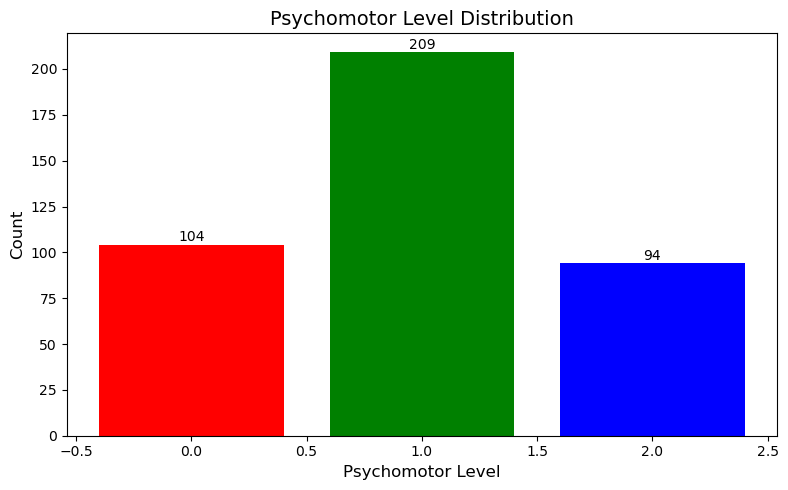

In [8]:
levels_counts = df['Psychomotor_Level'].value_counts()

plt.figure(figsize=(8, 5))
bars = plt.bar(levels_counts.index, levels_counts.values, color=['green', 'red', 'blue'])

plt.xlabel('Psychomotor Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Psychomotor Level Distribution', fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 2, str(height), ha='center', fontsize=10)

total_count = levels_counts.sum()
print(f"Total Count: {total_count}")
# plt.text(1, total_count + 5, f'Total: {total_count}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

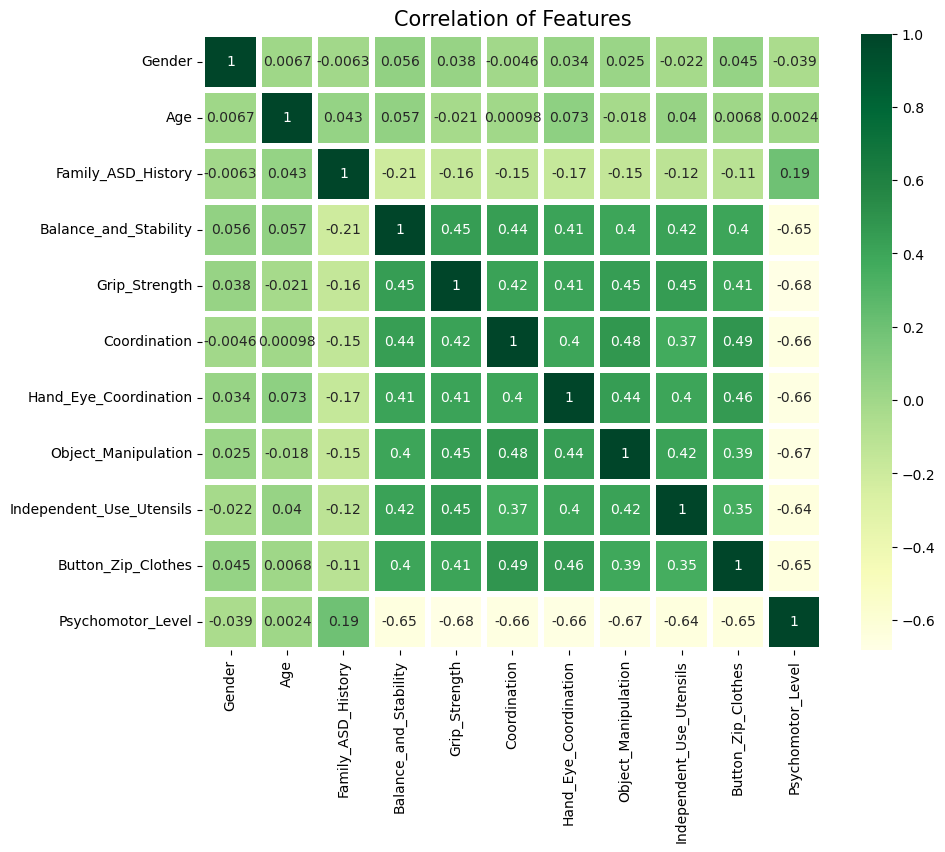

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the plot size by specifying figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
sns.heatmap(df.corr(),ax=ax, annot=True,linewidth=3 ,cmap="YlGn")

#plot title
plt.title("Correlation of Features", size=15, y=1)

# Show the plot
plt.show()

In [10]:
#Sorting correlation values in descending order by Psychomotor_Level attribute
df.corr()["Psychomotor_Level"].sort_values(ascending=False)

Psychomotor_Level           1.000000
Family_ASD_History          0.194563
Age                         0.002446
Gender                     -0.039256
Independent_Use_Utensils   -0.644990
Button_Zip_Clothes         -0.646151
Balance_and_Stability      -0.649932
Coordination               -0.659418
Hand_Eye_Coordination      -0.661476
Object_Manipulation        -0.667127
Grip_Strength              -0.680338
Name: Psychomotor_Level, dtype: float64

In [11]:
#Removing highly correlated features

#create positive correlation matrix
corr_df = df.corr().abs()

#select upper tringle of correlation matrix
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

tri_df


,Gender,Age,Family_ASD_History,Balance_and_Stability,Grip_Strength,Coordination,Hand_Eye_Coordination,Object_Manipulation,Independent_Use_Utensils,Button_Zip_Clothes,Psychomotor_Level
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.006710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_ASD_History,0.006326,0.042509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance_and_Stability,0.055524,0.056624,0.207601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grip_Strength,0.038274,0.021146,0.158514,0.447644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coordination,0.004594,0.000978,0.147640,0.437407,0.416347,NaN,NaN,NaN,NaN,NaN,NaN
Hand_Eye_Coordination,0.033620,0.072651,0.167850,0.412645,0.411602,0.397343,NaN,NaN,NaN,NaN,NaN
Object_Manipulation,0.025102,0.017609,0.153838,0.400036,0.445107,0.475384,0.443092,NaN,NaN,NaN,NaN
Independent_Use_Utensils,0.021766,0.040374,0.117976,0.418853,0.449207,0.367238,0.397574,0.421802,NaN,NaN,NaN
Button_Zip_Clothes,0.044674,0.006797,0.107495,0.398189,0.405732,0.488010,0.456715,0.385978,0.35397,NaN,NaN


In [12]:
#Find index of features columns with correlation greater then 0.95
to_drop = [column for column in tri_df.columns if any (tri_df[column] > 0.95)]
print(); print(to_drop)


[]


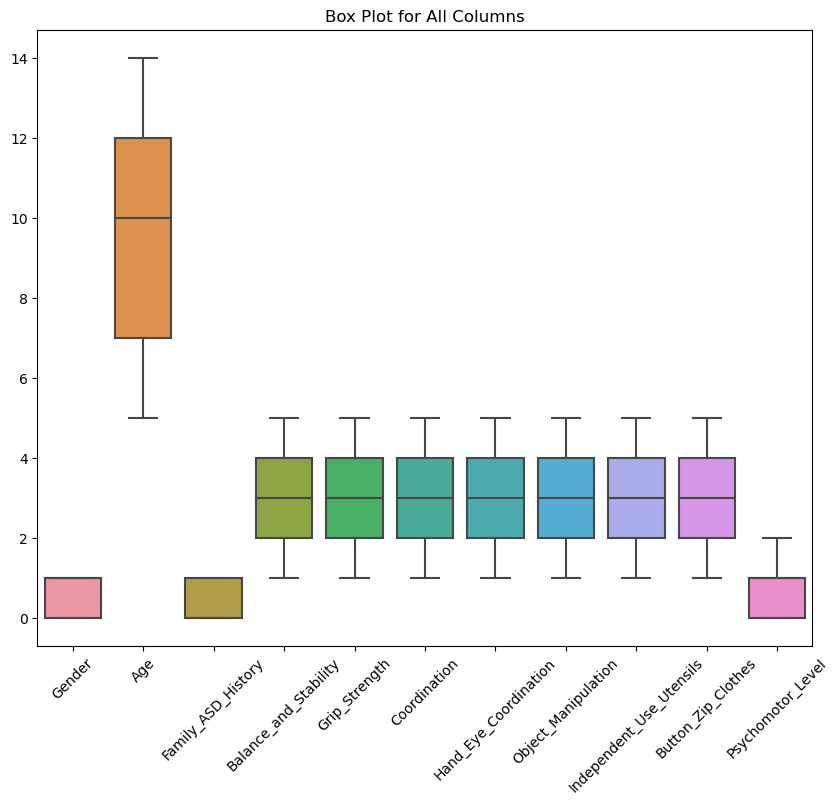

In [13]:
#Find outliers
# Create a box plot for all numerical columns in the dataset
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Box Plot for All Columns')
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()

In [14]:
X = df.drop("Psychomotor_Level", axis=1)  # Features
y = df["Psychomotor_Level"]  # Target variable

In [15]:
# Split the Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

# Print sizes to verify
print(f"Train size: {len(y_train)}")
print(f"Test size: {len(y_test)}")

Train size: 284
Test size: 123


In [16]:
y_train.value_counts()

1    146
0     72
2     66
Name: Psychomotor_Level, dtype: int64

In [17]:
y_test.value_counts()

1    63
0    32
2    28
Name: Psychomotor_Level, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
y_train_resampled.value_counts()

1    146
0    146
2    146
Name: Psychomotor_Level, dtype: int64

## Bagging techniques

### BaggingClassifier

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Initialize the base BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Specify the number of cross-validation folds
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Define the hyperparameter grid for RandomizedSearchCV
# param_dist = {
#     'base_estimator__max_depth': [5, 10, 15, 20, 25],  # Focused depth values
#     'base_estimator__min_samples_split': [2, 5, 10, 15],  # Commonly effective split values
#     'base_estimator__min_samples_leaf': [1, 2, 5, 10],  # Commonly effective leaf values
#     'n_estimators': [50, 100, 150, 200],  # Typical ensemble sizes
#     'max_samples': [0.6, 0.7, 0.8, 0.9, 1.0],  # Balanced sampling ranges
#     'max_features': [0.6, 0.8, 1.0],  # Reduced range for feature sampling
#     'bootstrap': [True, False],  # Keep bootstrap sampling options
# }
param_dist = {
    'base_estimator__max_depth': list(range(5, 26)),  # Values from 5 to 25
    'base_estimator__min_samples_split': list(range(2, 16)),  # Values from 2 to 15
    'base_estimator__min_samples_leaf': list(range(1, 11)),  # Values from 1 to 10
    'n_estimators': list(range(50, 201, 50)),  # Values from 50 to 200
    'max_samples': [x/10 for x in range(6, 11)],  # Values from 0.6 to 1.0
    'max_features': [x/10 for x in range(6, 11)],  # Values from 0.6 to 1.0
    'bootstrap': [True, False]  # Bootstrap options
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    bagging_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random combinations to try
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train_resampled, y_train_resampled)
# random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Extract parameters for the base estimator (DecisionTreeClassifier)
base_estimator_params = {
    'max_depth': best_params.pop('base_estimator__max_depth'),
    'min_samples_split': best_params.pop('base_estimator__min_samples_split'),
    'min_samples_leaf': best_params.pop('base_estimator__min_samples_leaf'),
}

# Initialize the base DecisionTreeClassifier with the best parameters
base_estimator = DecisionTreeClassifier(**base_estimator_params, random_state=42)

# Initialize the optimized BaggingClassifier with the best parameters
optimized_bagging_model = BaggingClassifier(estimator=base_estimator, **best_params, random_state=42)

# Perform K-fold cross-validation to evaluate the optimized model
scores = cross_val_score(optimized_bagging_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

# Calculate and print mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 100, 'max_samples': 0.6, 'max_features': 0.6, 'bootstrap': False, 'base_estimator__min_samples_split': 3, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_depth': 7}
Cross-Validation Accuracy Scores:
Fold 1: 0.965909
Fold 2: 0.931818
Fold 3: 0.954545
Fold 4: 0.931034
Fold 5: 0.965517
Mean Accuracy: 0.949765
Standard Deviation: 0.015521


##### 70 - 30 split model training and evaluation

In [21]:
# Fit model for train set
optimized_bagging_model.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(max_depth=7,
                                                   min_samples_leaf=2,
                                                   min_samples_split=3,
                                                   random_state=42),
                  max_features=0.6, max_samples=0.6, n_estimators=100,
                  random_state=42)

In [22]:
# Training accuracy
bc_train_accuracy = optimized_bagging_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {bc_train_accuracy:.6f}")

# Test accuracy
bc_test_accuracy = optimized_bagging_model.score(X_test, y_test)
print(f"Test Accuracy: {bc_test_accuracy:.6f}")

Training Accuracy: 0.990868
Test Accuracy: 0.918699


BaggingClassifier Classification Report:
              precision    recall  f1-score   support

           0   0.933333  0.875000  0.903226        32
           1   0.920635  0.920635  0.920635        63
           2   0.900000  0.964286  0.931034        28

    accuracy                       0.918699       123
   macro avg   0.917989  0.919974  0.918298       123
weighted avg   0.919241  0.918699  0.918473       123



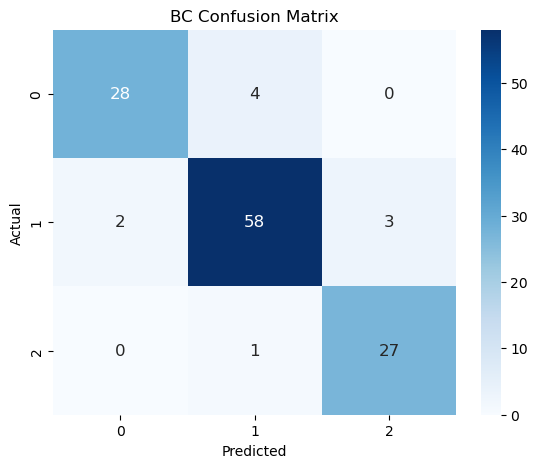

In [23]:
# Use the trained Random Forest model to make predictions on the test data
y_pred = optimized_bagging_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("BaggingClassifier Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BC Confusion Matrix')
plt.show()

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# # Define the hyperparameter grid for RandomizedSearchCV
# param_dist = {
#     'n_estimators': range(100, 501, 50),  # Increased range for n_estimators
#     'max_depth': range(3, 16),  # Limit max_depth to prevent deep trees
#     'min_samples_split': range(10, 51, 5),  # Increased min_samples_split
#     'min_samples_leaf': range(10, 31, 5),  # Increased min_samples_leaf
#     'max_features': ['sqrt', 'log2'],  # Use a smaller number of features for each tree
#     'bootstrap': [True],  # Force bootstraping to reduce overfitting
#     'criterion': ['gini']  # Use only 'gini' as the criterion to prevent overfitting
# }
param_dist = {
    'n_estimators': list(range(100, 501)),  # Range from 100 to 500, with a step size of 50
    'max_depth': list(range(3, 16)),  # Range from 3 to 15 for max_depth
    'min_samples_split': list(range(10, 51)),  # Range from 10 to 50 for min_samples_split
    'min_samples_leaf': list(range(10, 31)),  # Range from 10 to 30 for min_samples_leaf
    'max_features': ['sqrt', 'log2'],  # Include 'None' to use all features
    'bootstrap': [True, False],  # Both True and False for bootstrap sampling
    'criterion': ['gini', 'entropy']  # Including 'entropy' criterion option
}


# Create RandomizedSearchCV with the Random Forest model and parameter grid
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random combinations to try
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Perform Randomized Search to find the best hyperparameters
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)

# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Best Hyperparameters: {'n_estimators': 198, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}
Cross-Validation Accuracy Scores:
Fold 1: 0.947368
Fold 2: 0.824561
Fold 3: 0.877193
Fold 4: 0.894737
Fold 5: 0.982143
Mean Accuracy: 0.905201
Standard Deviation: 0.054945


##### 70 - 30 split model training and evaluation

In [25]:
# Fit model for train set
best_rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=12,
                       min_samples_split=10, n_estimators=198)

In [26]:
# Training accuracy
rf_train_accuracy = best_rf_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {rf_train_accuracy:.6f}")

# Test accuracy
rf_test_accuracy = best_rf_model.score(X_test, y_test)
print(f"Test Accuracy: {rf_test_accuracy:.6f}")

Training Accuracy: 0.963470
Test Accuracy: 0.894309


In [27]:
# Calculate training error
dt_train_pred = best_rf_model.predict(X_train)
mse_train = mean_squared_error(y_train, dt_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
dt_test_pred = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, dt_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of RF Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of RF Tree Model:", mse_test)



Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of RF Model: 0.04929577464788732
Mean Squared Error (MSE) on Testing Set of RF Tree Model: 0.10569105691056911


RF Classification Report:
              precision    recall  f1-score   support

           0   0.903226  0.875000  0.888889        32
           1   0.916667  0.873016  0.894309        63
           2   0.843750  0.964286  0.900000        28

    accuracy                       0.894309       123
   macro avg   0.887881  0.904101  0.894399       123
weighted avg   0.896571  0.894309  0.894194       123



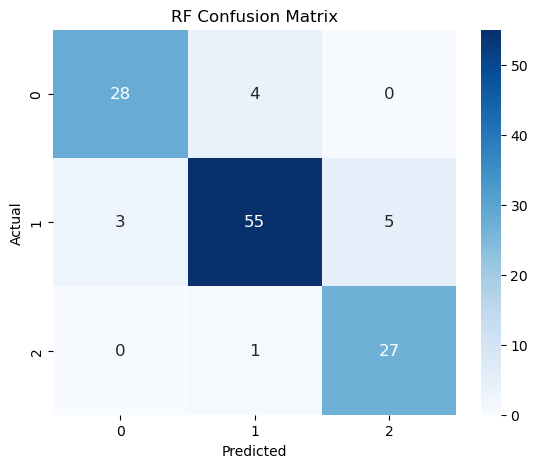

In [28]:
# Use the trained Random Forest model to make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("RF Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix')
plt.show()

## Boosting techniques

### XGBoost

In [29]:
# Create an instance of the XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# # Define the hyperparameter grid for RandomizedSearchCV
# param_dist = {
#     'n_estimators': [100, 150, 200],  # Number of trees
#     'max_depth': [3, 4, 5],  # Shallower trees to prevent overfitting
#     'learning_rate': [0.01, 0.05, 0.1],  # Lower learning rate
#     'subsample': [0.6, 0.7, 0.8],  # Fraction of samples used per tree
#     'colsample_bytree': [0.6, 0.7, 0.8],  # Fraction of features used per tree
#     'min_child_weight': [10, 15, 20],  # Higher values to reduce overfitting
#     'gamma': [0.2, 0.5, 1.0],  # Minimum loss reduction for splits
#     'reg_alpha': [0.5, 1.0, 2.0], #L1 regularization
#     'reg_lambda': [1.0, 2.0, 3.0], # L2 regularization
# }
# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': list(range(100, 201)),  # All integer values between 100 and 200
    'max_depth': list(range(3, 6)),  # All integer values between 3 and 5
    'learning_rate': [0.01, 0.05, 0.1],  # Directly list explicit values
    'subsample': [0.6, 0.7, 0.8],  # Directly list explicit values
    'colsample_bytree': [0.6, 0.7, 0.8],  # Directly list explicit values
    'min_child_weight': list(range(10, 21)),  # All integer values between 10 and 20
    'gamma': [0.2, 0.5, 1.0],  # Directly list explicit values
#     'reg_alpha': [0.5, 1.0, 2.0],  # Directly list explicit values
#     'reg_lambda': [1.0, 2.0, 3.0]  # Directly list explicit values
}


# Create RandomizedSearchCV with the XGBoost model and parameter grid
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random combinations to try
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Perform Randomized Search to find the best hyperparameters
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)

# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(best_xgb_model,X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 186, 'min_child_weight': 11, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.7}
Cross-Validation Accuracy Scores:
Fold 1: 0.909091
Fold 2: 0.920455
Fold 3: 0.909091
Fold 4: 0.942529
Fold 5: 0.965517
Mean Accuracy: 0.929336
Standard Deviation: 0.021825


##### 70 - 30 split model training and evaluation for XG Boost

In [30]:
# Fit XGB model for train set
best_xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=11, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=186, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
# Training accuracy
xgb_train_accuracy = best_xgb_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {xgb_train_accuracy:.6f}")

# Test accuracy
xgb_test_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Test Accuracy: {xgb_test_accuracy:.6f}")

Training Accuracy: 0.970320
Test Accuracy: 0.878049


XGB Classification Report:
              precision    recall  f1-score   support

           0   0.903226  0.875000  0.888889        32
           1   0.875000  0.888889  0.881890        63
           2   0.857143  0.857143  0.857143        28

    accuracy                       0.878049       123
   macro avg   0.878456  0.873677  0.875974       123
weighted avg   0.878278  0.878049  0.878077       123



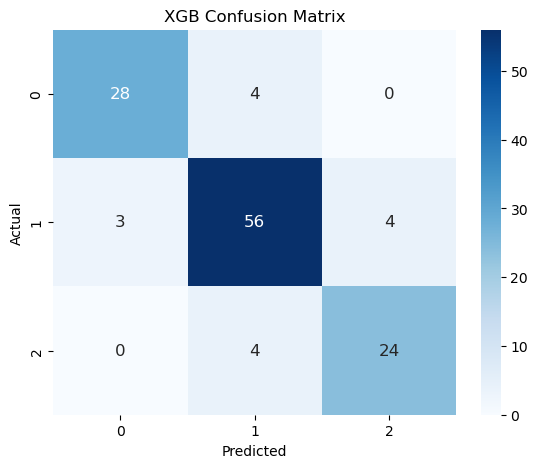

In [32]:
# Use the trained XGB model to make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("XGB Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()

### Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Initialize GradientBoostingClassifier
gradient_boost_model = GradientBoostingClassifier(random_state=42)

# # Increase randomness with subsample and make further adjustments to prevent overfitting
# param_dist_gb = {
#     'n_estimators': range(50, 201, 50),  # Increase range for more flexibility
#     'learning_rate': np.linspace(0.01, 0.05, 5),  # Use smaller learning rates
#     'max_depth': range(3, 6),  # Prevent overfitting with shallow trees
#     'min_samples_split': range(10, 31, 5),  # Larger splits for generalization
#     'min_samples_leaf': range(10, 31, 5),  # Larger leaf size
#     'subsample': np.linspace(0.6, 0.9, 4),  # Increase randomness with lower subsampling
#     'max_features': ['sqrt', 'log2', None],  # Limit features per split
#     'min_impurity_decrease': np.linspace(0.0, 0.05, 5),  # Stop small splits
#     'criterion': ['friedman_mse', 'squared_error']  # Experiment with different criteria
# }
# Define the hyperparameter grid for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': list(range(50, 201)),  # Evaluate each value from 50 to 200
    'learning_rate': np.linspace(0.001, 0.05, 50).tolist(),  # 50 evenly spaced values between 0.001 and 0.05
    'max_depth': list(range(3, 6)),  # Evaluate each value from 3 to 5
    'min_samples_split': list(range(10, 31)),  # Evaluate each value from 10 to 30
    'min_samples_leaf': list(range(10, 31)),  # Evaluate each value from 10 to 30
    'subsample': np.linspace(0.6, 0.9, 4).tolist(),  # Explicit subsample values: 0.6, 0.7, 0.8, 0.9
    'max_features': ['sqrt', 'log2', None],  # Explicitly list all feature selection options
    'min_impurity_decrease': np.linspace(0.0, 0.05, 6).tolist(),  # 6 evenly spaced values between 0.0 and 0.05
    'criterion': ['friedman_mse', 'squared_error']  # Explicitly list criteria
}


# Specify the number of cross-validation folds (K) - e.g., 10-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search_gb = RandomizedSearchCV(
    gradient_boost_model,
    param_distributions=param_dist_gb,
    n_iter=500,
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to find the best parameters
random_search_gb.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_gb = random_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Initialize the optimized GradientBoostingClassifier
optimized_gb_model = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Perform K-fold cross-validation
scores_gb = cross_val_score(optimized_gb_model,X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores for Gradient Boosting:")
for i, score in enumerate(scores_gb):
    print(f"Fold {i+1}: {score:.6f}")

# Calculate and print mean accuracy and standard deviation
mean_accuracy_gb = np.mean(scores_gb)
std_accuracy_gb = np.std(scores_gb)
print(f"Mean Accuracy: {mean_accuracy_gb:.6f}")
print(f"Standard Deviation: {std_accuracy_gb:.6f}")


Best Hyperparameters for Gradient Boosting: {'subsample': 0.6, 'n_estimators': 194, 'min_samples_split': 23, 'min_samples_leaf': 11, 'min_impurity_decrease': 0.0, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.032, 'criterion': 'squared_error'}
Cross-Validation Accuracy Scores for Gradient Boosting:
Fold 1: 0.954545
Fold 2: 0.931818
Fold 3: 0.965909
Fold 4: 0.931034
Fold 5: 0.954023
Mean Accuracy: 0.947466
Standard Deviation: 0.013770


##### 70 - 30 split model training and evaluation for Gradient Boost

In [34]:
# Fit XGB model for train set
optimized_gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.032,
                           max_features='sqrt', min_samples_leaf=11,
                           min_samples_split=23, n_estimators=194,
                           random_state=42, subsample=0.6)

In [35]:
# Training accuracy
GB_train_accuracy = optimized_gb_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {GB_train_accuracy:.6f}")

# Test accuracy
GB_test_accuracy = optimized_gb_model.score(X_test, y_test)
print(f"Test Accuracy: {GB_test_accuracy:.6f}")

Training Accuracy: 0.986301
Test Accuracy: 0.894309


GB Classification Report:
              precision    recall  f1-score   support

           0   0.903226  0.875000  0.888889        32
           1   0.903226  0.888889  0.896000        63
           2   0.866667  0.928571  0.896552        28

    accuracy                       0.894309       123
   macro avg   0.891039  0.897487  0.893814       123
weighted avg   0.894903  0.894309  0.894276       123



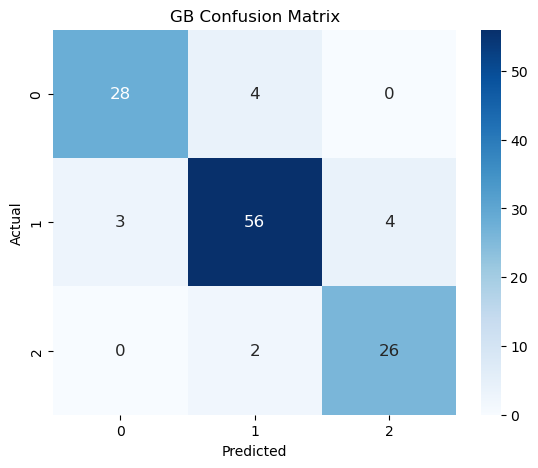

In [36]:
# Use the trained XGB model to make predictions on the test data
y_pred = optimized_gb_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("GB Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GB Confusion Matrix')
plt.show()

## Ada Boost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Initialize AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Specify the number of cross-validation folds
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Define the hyperparameter grid for RandomizedSearchCV with ranges
param_dist_ada = {
    'base_estimator__max_depth': list(range(2, 6)),  # Explicitly list values from 2 to 5
    'base_estimator__min_samples_split': list(range(10, 51)),  # Explicitly list values from 10 to 50
    'base_estimator__min_samples_leaf': list(range(5, 31)),  # Explicitly list values from 5 to 30
    'base_estimator__max_features': ['sqrt', 'log2'],  # Explicitly list the feature selection options
    'base_estimator__max_leaf_nodes': list(range(10, 31)),  # Explicitly list values from 10 to 30
    'n_estimators': list(range(10, 51)),  # Explicitly list values from 10 to 50
    'learning_rate': np.linspace(0.001, 0.05, 50).tolist(),  # Explicitly list 50 evenly spaced values
}

# Perform RandomizedSearchCV
random_search_ada = RandomizedSearchCV(
    adaboost_model,
    param_distributions=param_dist_ada,
    n_iter=500,
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to find the best parameters
random_search_ada.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_ada = random_search_ada.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_ada)

# Extract parameters for the base estimator (DecisionTreeClassifier)
ada_base_estimator_params = {
    key.split('__')[1]: value for key, value in best_params_ada.items() if key.startswith('base_estimator__')
}

# Remove `base_estimator__` parameters from `best_params_ada`
best_params_ada = {key: value for key, value in best_params_ada.items() if not key.startswith('base_estimator__')}

# Initialize the optimized base estimator (DecisionTreeClassifier)
ada_base_estimator = DecisionTreeClassifier(**ada_base_estimator_params, random_state=42)

# Initialize the optimized AdaBoostClassifier
optimized_ada_model = AdaBoostClassifier(base_estimator=ada_base_estimator, **best_params_ada, random_state=42)

# Perform K-fold cross-validation
scores_ada = cross_val_score(optimized_ada_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores for AdaBoost:")
for i, score in enumerate(scores_ada):
    print(f"Fold {i+1}: {score:.6f}")

# Calculate and print mean accuracy and standard deviation
mean_accuracy_ada = np.mean(scores_ada)
std_accuracy_ada = np.std(scores_ada)
print(f"Mean Accuracy: {mean_accuracy_ada:.6f}")
print(f"Standard Deviation: {std_accuracy_ada:.6f}")


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameters for AdaBoost: {'n_estimators': 37, 'learning_rate': 0.009000000000000001, 'base_estimator__min_samples_split': 31, 'base_estimator__min_samples_leaf': 8, 'base_estimator__max_leaf_nodes': 26, 'base_estimator__max_features': 'sqrt', 'base_estimator__max_depth': 4}


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-Validation Accuracy Scores for AdaBoost:
Fold 1: 0.943182
Fold 2: 0.954545
Fold 3: 0.965909
Fold 4: 0.942529
Fold 5: 0.965517
Mean Accuracy: 0.954336
Standard Deviation: 0.010226


##### 70 - 30 split model training and evaluation for XG Boost

In [38]:
# Fit AdaBoost model for train set
optimized_ada_model.fit(X_train_resampled, y_train_resampled)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=26,
                                                         min_samples_leaf=8,
                                                         min_samples_split=31,
                                                         random_state=42),
                   learning_rate=0.009000000000000001, n_estimators=37,
                   random_state=42)

In [39]:
# Training accuracy
ab_train_accuracy = optimized_ada_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {ab_train_accuracy:.6f}")

# Test accuracy
ab_test_accuracy = optimized_ada_model.score(X_test, y_test)
print(f"Test Accuracy: {ab_test_accuracy:.6f}")

Training Accuracy: 0.981735


Test Accuracy: 0.902439


Ada Boot Classification Report:
              precision    recall  f1-score   support

           0   0.900000  0.843750  0.870968        32
           1   0.904762  0.904762  0.904762        63
           2   0.900000  0.964286  0.931034        28

    accuracy                       0.902439       123
   macro avg   0.901587  0.904266  0.902255       123
weighted avg   0.902439  0.902439  0.901951       123



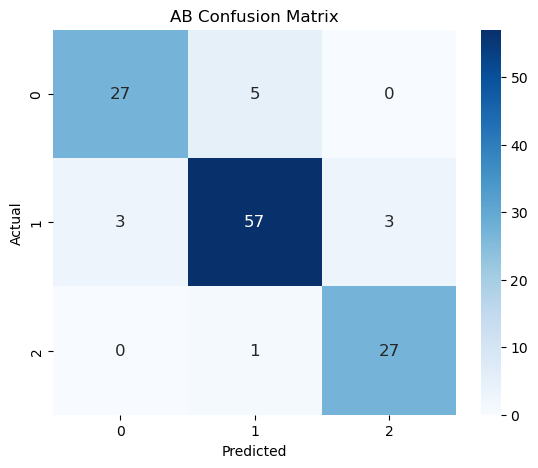

In [40]:
# Use the trained AB model to make predictions on the test data
y_pred = optimized_ada_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("Ada Boot Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AB Confusion Matrix')
plt.show()

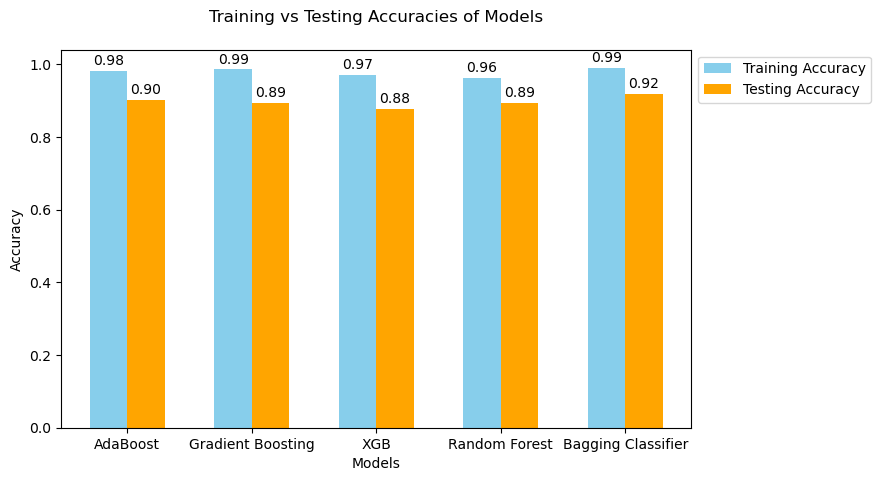

In [41]:
# Define models and their accuracies dynamically
models = ['AdaBoost', 'Gradient Boosting', 'XGB','Random Forest', 'Bagging Classifier']
train_accuracies = [ab_train_accuracy, GB_train_accuracy,xgb_train_accuracy, rf_train_accuracy, bc_train_accuracy]
test_accuracies = [ab_test_accuracy, GB_test_accuracy,xgb_test_accuracy, rf_test_accuracy, bc_test_accuracy]

# Bar chart setup
x = np.arange(len(models))  # Label locations
width = 0.3  # Width of the bars

# Increase figure size for clarity
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with adjusted bar spacing
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('Training vs Testing Accuracies of Models', fontsize=12,  pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Add accuracy values on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 2),  # Increase text offset for clarity
                textcoords="offset points",
                ha='center', va='bottom')

# Add padding around the chart
plt.tight_layout(pad=5.0)

# Show the plot
plt.show()

In [42]:
# Create a VotingClassifier with the best hyperparameters for voting='hard'
ensemble_classifier = VotingClassifier(
    estimators=[('rf', best_rf_model), ('ab', optimized_ada_model), ('bag', optimized_bagging_model)],
    voting='hard'  # Uses majority rule voting, where the class with the most votes is selected 
)

In [43]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(ensemble_classifier, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [44]:
# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.943182
Fold 2: 0.943182
Fold 3: 0.965909
Fold 4: 0.931034
Fold 5: 0.954023


In [45]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.947466
Standard Deviation: 0.011746


In [46]:
# Fit model for train set
ensemble_classifier.fit(X_train_resampled, y_train_resampled)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=9,
                                                     max_features='log2',
                                                     min_samples_leaf=12,
                                                     min_samples_split=10,
                                                     n_estimators=198)),
                             ('ab',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                                       max_features='sqrt',
                                                                                       max_leaf_nodes=26,
                                                                                       min_samples_leaf=8,
                                                                                       min_samples_split=31,
                                                                                       random_state=42),
                                                 learning_rate=0.009000000000000001,
                                                 n_estimators=37,
                                                 random_state=42)),
                             ('bag',
                              BaggingClassifier(bootstrap=False,
                                                estimator=DecisionTreeClassifier(max_depth=7,
                                                                                 min_samples_leaf=2,
                                                                                 min_samples_split=3,
                                                                                 random_state=42),
                                                max_features=0.6,
                                                max_samples=0.6,
                                                n_estimators=100,
                                                random_state=42))])

In [47]:
# Training accuracy
ensemble_train_accuracy = ensemble_classifier.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {ensemble_train_accuracy:.6f}")

# Test accuracy
ensemble_test_accuracy = ensemble_classifier.score(X_test, y_test)
print(f"Test Accuracy: {ensemble_test_accuracy:.6f}")

Training Accuracy: 0.986301
Test Accuracy: 0.926829


EEC Classification Report:
              precision    recall  f1-score   support

           0   0.933333  0.875000  0.903226        32
           1   0.921875  0.936508  0.929134        63
           2   0.931034  0.964286  0.947368        28

    accuracy                       0.926829       123
   macro avg   0.928748  0.925265  0.926576       123
weighted avg   0.926941  0.926829  0.926545       123



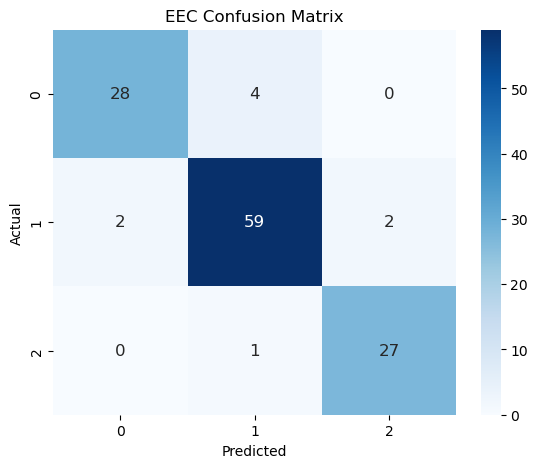

In [ ]:
# Use the trained XGB model to make predictions on the test data
y_pred = ensemble_classifier.predict(X_test)

# Print the Classification Report with 6 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("EEC Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('EEC Confusion Matrix')
plt.show()

### Save the models

In [53]:
import pickle

# Save the Voting Classifier model
with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(ensemble_classifier, f)

# Save individual models as well
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(optimized_gb_model, f)
with open('abboost_model.pkl', 'wb') as f:
    pickle.dump(optimized_ada_model, f)
with open('bagging_classifier_model.pkl', 'wb') as f:
    pickle.dump(optimized_bagging_model, f)


## Voting Classifier Prediction Application

This Python script allows users to input their feature values and get predictions from a pre-trained `Voting Classifier` model. The model was trained using three classifiers: Gradient Boosting, Ada Boost, and Bagging Classifier.

### Steps:
1. Load the saved `Voting Classifier` model from a `.pkl` file.
2. Prompt the user to enter values for the model's features.
3. Use the model to predict the class based on the entered feature values.
4. Display the predicted class & activities.

In [ ]:
import pandas as pd

# Correct the placeholder for feature names with consistent spacing
column_names = [
    "Gender", "Age", "Family_ASD_History",
    "Balance_and_Stability", "Grip_Strength", "Coordination",
    "Hand_Eye_Coordination", "Object_Manipulation",
    "Independent_Use_Utensils", "Button_Zip_Clothes"
]

def get_valid_PMinput(prompt):
    """Get valid psychomotor input scores from the user."""
    while True:
        user_input = input(prompt).strip()
        if not user_input:
            print("Please enter a score.")
        elif user_input.isdigit() and 1 <= int(user_input) <= 5:
            return int(user_input)
        else:
            print("Invalid score. Please enter a score between 1 and 5.")

def suggest_PMactivities(level, age):
    """Suggest activities based on psychomotor level and age."""
    activities_by_age = {
        "Severe": {
            "5-8": ["Threading Beads", "Drawing Shapes", "Color Sorting"],
            "9-11": ["Building Block Towers", "Tracing Patterns", "Basic Finger Exercises"],
            "12-14": ["Learning Basic Crafts", "Simple Hand Exercises", "Gardening Tasks"]
        },
        "Moderate": {
            "5-8": ["Throwing and Catching Balls", "Buttoning Shirts", "Walking on a Line"],
            "9-11": ["Cutting Shapes with Scissors", "Tracing Letters", "Interactive Dance Steps"],
            "12-14": ["Learning to Type", "Organizing Small Objects", "Structured Physical Games"]
        },
        "Mild": {
            "5-8": ["Hand-over-Hand Assistance Tasks", "Sensory Play with Sand or Water", "Simple Arm Movements"],
            "9-11": ["Interactive Music Therapy", "Pushing Large Objects", "Basic Yoga Poses"],
            "12-14": ["Basic Physical Therapy Exercises", "Guided Art Therapy", "Learning to Stack Blocks"]
        }
    }

    # Determine the age range
    if 5 <= age <= 8:
        age_range = "5-8"
    elif 9 <= age <= 11:
        age_range = "9-11"
    elif 12 <= age <= 14:
        age_range = "12-14"
    else:
        raise ValueError("Age out of range")

    recommended_activities = activities_by_age[level][age_range]
    print(f"\nRecommended Activities for {level} Level (Age {age_range}):")
    for activity in recommended_activities:
        print(f"- {activity}")
    return recommended_activities

def predict_user_input_psychomotor_level():
    """Predict psychomotor level based on user inputs."""
    print("Please enter the following details:")
    Gender = input("Gender (Male=1/Female=0): ").strip()
    while Gender not in ["0", "1"]:
        print("Invalid input. Please enter 1 for Male or 0 for Female.")
        Gender = input("Gender (Male=1/Female=0): ").strip()

    Age = input("Age (5 to 14): ").strip()
    while not Age.isdigit() or not (5 <= int(Age) <= 14):
        print("Invalid age. Please enter a valid age between 5 and 14.")
        Age = input("Age: ").strip()
    Age = int(Age)  # Convert Age to an integer after validation

    Family_ASD_History = input("Does the family have a history of ASD? (Yes=1/No=0): ").strip()
    while Family_ASD_History not in ["0", "1"]:
        print("Invalid input. Please enter 1 for Yes or 0 for No.")
        Family_ASD_History = input("Does the family have a history of ASD? (Yes=1/No=0): ").strip()

    print("\nAnswer the following questions about your child's abilities (1 to 5):")
    print("Never Have - 1, Rarely - 2, Maybe - 3, Often - 4, Always - 5")
    Balance_and_Stability = get_valid_PMinput("Can your child maintain their balance while standing or walking without assistance? ")
    Grip_Strength = get_valid_PMinput("Can your child grip or squeeze objects effectively? ")
    Coordination = get_valid_PMinput("Can your child coordinate their large muscle groups for activities like running, jumping, or climbing? ")
    Hand_Eye_Coordination = get_valid_PMinput("Can your child coordinate their hands with what they see (e.g., catching a ball or tracing shapes)? ")
    Object_Manipulation = get_valid_PMinput("Can your child manipulate small objects (e.g., blocks, beads, or scissors) with their hands effectively? ")
    Independent_Use_Utensils = get_valid_PMinput("Can your child independently use utensils to eat? ")
    Button_Zip_Clothes = get_valid_PMinput("Can your child button or zip their clothes independently? ")

    # Create a DataFrame with the corrected column names
    user_data = pd.DataFrame([[
        int(Gender), Age, int(Family_ASD_History),
        Balance_and_Stability, Grip_Strength, Coordination,
        Hand_Eye_Coordination, Object_Manipulation,
        Independent_Use_Utensils, Button_Zip_Clothes
    ]], columns=column_names)

    # Predict the level using the trained model
    # Replace `ensemble_classifier` with your actual trained model
    predicted_level_index = ensemble_classifier.predict(user_data)
    level_mapping = {0: "Mild", 1: "Moderate", 2: "Severe"}
    predicted_level = level_mapping[predicted_level_index[0]]
    print("\nPredicted Psychomotor Level:", predicted_level)

    # Suggest activities
    return suggest_PMactivities(predicted_level, Age), predicted_level

# Run the prediction
predict_user_input_psychomotor_level()


Please enter the following details:

Answer the following questions about your child's abilities (1 to 5):
Never Have - 1, Rarely - 2, Maybe - 3, Often - 4, Always - 5

Predicted Psychomotor Level: Mild

Recommended Activities for Mild Level (Age 5-8):
- Threading Beads
- Drawing Shapes
- Color Sorting


(['Threading Beads', 'Drawing Shapes', 'Color Sorting'], 'Mild')